## LangGraph Simple Work Flow

### Data Classes are another way to achieve similar as TypeDict

### State
    The State schema serves as the input schema for all Nodes and Edges in the graph.

In [12]:
from dataclasses import dataclass

@dataclass
class DataClassState():
    """Represents the state of the graph."""
    graph_info:str
    

### Node
    Nodes are just python functions.
    The first positional argument is the state, as defined above.

In [13]:
def start_play(state:DataClassState):
    """Start playing the game."""
    return {"graph_info": f"{state.graph_info} - Game started!"}

def soccer(state:DataClassState):
    """Start playing soccer game."""
    return {"graph_info": f"{state.graph_info} - Soccer started!"}

def basketball(state:DataClassState):
    """Start playing Basketball game."""
    return {"graph_info":f"{state.graph_info} - Basketball started!"}


In [14]:
import random

from typing import Literal
def random_game(state:DataClassState)->Literal["soccer", "basketball"]:
    """Randomly choose a game to play."""
    graph_info = state.graph_info
    
    if random.random()>0.5:
        return "soccer"
    else:
        return "basketball"

### Graph Construction
        Building graph based on components defined above.

<function random_game at 0x1200f8ae0>


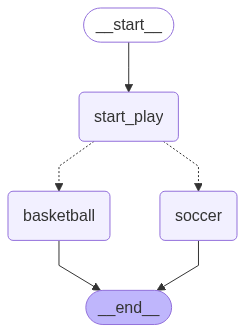

In [15]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

#Building the graph
graph=StateGraph(DataClassState)

# Adding nodes to the graph
graph.add_node("start_play", start_play)
graph.add_node("soccer", soccer)
graph.add_node("basketball", basketball)

#Flow of the graph
graph.add_edge(START, "start_play")
print(random_game)
graph.add_conditional_edges("start_play", random_game)
graph.add_edge("soccer", END)
graph.add_edge("basketball", END)

#compile the graph
build_graph = graph.compile()

# Display the graph
display(Image(build_graph.get_graph().draw_mermaid_png()))


In [30]:
#Graph Invocation
build_graph.invoke(DataClassState(graph_info="Starting the game!"))

{'graph_info': 'Starting the game! - Game started! - Basketball started!'}